<a href="https://colab.research.google.com/github/VineetSivadasan/houses/blob/main/Multivariate_Logistic_Regression_Cirrhosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
dfCirrhosis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cirrhosis.csv')
print(dfCirrhosis)

     index  duration  status  ...  platelets  prothrombin  stage
0        1       400       2  ...      190.0         12.2      4
1        2      4500       0  ...      221.0         10.6      3
2        3      1012       2  ...      151.0         12.0      4
3        4      1925       2  ...      183.0         10.3      4
4        5      1504       1  ...      136.0         10.9      3
..     ...       ...     ...  ...        ...          ...    ...
307    308      1153       0  ...      288.0         10.4      2
308    309       994       0  ...      231.0         10.8      2
309    310       939       0  ...      234.0         10.2      2
310    311       839       0  ...      335.0         10.5      2
311    312       788       0  ...      200.0         10.8      2

[312 rows x 20 columns]


In [ ]:
#checking to see if there are NaN values in any cell
checking_NaN = dfCirrhosis.isnull().values.any() 
checking_NaN

True

In [ ]:
#print the rows where NaN values appear in the cells
print_NaN_rows = dfCirrhosis[dfCirrhosis.isnull().any(axis=1)]  
print_NaN_rows.shape

(36, 20)

In [ ]:
dfCirrhosis.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
dfCirrhosis.shape

(276, 20)

In [ ]:
corr_matrix = dfCirrhosis.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
index,1.000000,-0.402368,-0.418221,-0.041206,-0.098009,0.058310,-0.104589,-0.034106,-0.112879,-0.180306,-0.092411,0.028938,-0.077182,-0.128823,-0.350902,-0.036171,-0.037842,-0.010447,-0.347180,-0.048347
duration,-0.402368,1.000000,-0.384526,0.019330,-0.143223,0.029385,-0.329450,-0.261022,-0.260605,-0.347114,-0.430252,-0.136734,0.401878,-0.361386,0.104443,-0.191062,-0.163853,0.159121,-0.128406,-0.363880
status,-0.418221,-0.384526,1.000000,-0.035851,0.225625,-0.177618,0.290965,0.291503,0.228698,0.327235,0.427397,0.190461,-0.270554,0.394547,0.276631,0.265366,0.226601,-0.086545,0.373804,0.321367
drug,-0.041206,0.019330,-0.035851,1.000000,-0.128076,0.071586,-0.046877,0.086582,-0.009260,-0.052741,0.080922,0.021723,0.053743,-0.028832,-0.009397,0.040706,0.017799,0.039366,0.070773,0.080087
age,-0.098009,-0.143223,0.225625,-0.128076,1.000000,-0.240648,0.250940,0.080850,-0.004182,0.254105,0.078177,-0.156638,-0.239676,0.082631,-0.019798,-0.120868,0.024710,-0.149650,0.244774,0.178980
sex,0.058310,0.029385,-0.177618,0.071586,-0.240648,1.000000,0.014830,-0.055305,0.142273,-0.014950,0.027474,0.008414,-0.079899,-0.251731,-0.019439,-0.008538,-0.051218,0.095021,-0.103977,-0.034206
ascites,-0.104589,-0.329450,0.290965,-0.046877,0.250940,0.014830,1.000000,0.149598,0.173254,0.634763,0.414603,-0.057578,-0.403384,0.247268,0.042037,0.080520,0.225414,-0.211158,0.361506,0.306251
hepatomology,-0.034106,-0.261022,0.291503,0.086582,0.080850,-0.055305,0.149598,1.000000,0.285068,0.169855,0.288092,0.140896,-0.271408,0.224367,0.132990,0.136204,0.162103,-0.179722,0.153115,0.479132
spiders,-0.112879,-0.260605,0.228698,-0.009260,-0.004182,0.142273,0.173254,0.285068,1.000000,0.279650,0.261701,0.061817,-0.225611,0.267521,0.035218,0.091350,0.102546,-0.157704,0.228985,0.316755
edema,-0.180306,-0.347114,0.327235,-0.052741,0.254105,-0.014950,0.634763,0.169855,0.279650,1.000000,0.414284,-0.109524,-0.391656,0.282815,0.060116,0.140642,0.087190,-0.241685,0.396914,0.272877


In [ ]:
del dfCirrhosis["bilirubin"]

In [ ]:
del dfCirrhosis["status"]

In [ ]:
del dfCirrhosis["index"]

In [ ]:
del dfCirrhosis["edema"]

In [ ]:
del dfCirrhosis["ascites"]

In [ ]:
dfCirrhosis

,duration,drug,age,sex,hepatomology,spiders,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,400,1,21464,1,1,1,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,4500,1,20617,1,1,1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,1012,1,25594,0,0,0,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,1925,1,19994,1,1,1,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,1504,2,13918,1,1,1,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,1,22347,1,1,0,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,994,2,21294,1,0,0,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,939,1,22767,1,0,0,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,839,1,13879,1,0,0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [ ]:
dfCirrhosis["duration"] = (dfCirrhosis["duration"]-dfCirrhosis["duration"].min())/(dfCirrhosis["duration"].max()-dfCirrhosis["duration"].min())
dfCirrhosis["drug"] = (dfCirrhosis["drug"]-dfCirrhosis["drug"].min())/(dfCirrhosis["drug"].max()-dfCirrhosis["drug"].min())
dfCirrhosis["age"] = (dfCirrhosis["age"]-dfCirrhosis["age"].min())/(dfCirrhosis["age"].max()-dfCirrhosis["age"].min())
dfCirrhosis["sex"] = (dfCirrhosis["sex"]-dfCirrhosis["sex"].min())/(dfCirrhosis["sex"].max()-dfCirrhosis["sex"].min())
#dfCirrhosis["ascites"] = (dfCirrhosis["ascites"]-dfCirrhosis["ascites"].min())/(dfCirrhosis["ascites"].max()-dfCirrhosis["ascites"].min())
dfCirrhosis["hepatomology"] = (dfCirrhosis["hepatomology"]-dfCirrhosis["hepatomology"].min())/(dfCirrhosis["hepatomology"].max()-dfCirrhosis["hepatomology"].min())
dfCirrhosis["spiders"] = (dfCirrhosis["spiders"]-dfCirrhosis["spiders"].min())/(dfCirrhosis["spiders"].max()-dfCirrhosis["spiders"].min())
#dfCirrhosis["edema"] = (dfCirrhosis["edema"]-dfCirrhosis["edema"].min())/(dfCirrhosis["edema"].max()-dfCirrhosis["edema"].min())
dfCirrhosis["cholesterol"] = (dfCirrhosis["cholesterol"]-dfCirrhosis["cholesterol"].min())/(dfCirrhosis["cholesterol"].max()-dfCirrhosis["cholesterol"].min())
dfCirrhosis["albumin"] = (dfCirrhosis["albumin"]-dfCirrhosis["albumin"].min())/(dfCirrhosis["albumin"].max()-dfCirrhosis["albumin"].min())
dfCirrhosis["copper"] = (dfCirrhosis["copper"]-dfCirrhosis["copper"].min())/(dfCirrhosis["copper"].max()-dfCirrhosis["copper"].min())
dfCirrhosis["phosphatase"] = (dfCirrhosis["phosphatase"]-dfCirrhosis["phosphatase"].min())/(dfCirrhosis["phosphatase"].max()-dfCirrhosis["phosphatase"].min())
dfCirrhosis["SGOT"] = (dfCirrhosis["SGOT"]-dfCirrhosis["SGOT"].min())/(dfCirrhosis["SGOT"].max()-dfCirrhosis["SGOT"].min())
dfCirrhosis["triglicerides"] = (dfCirrhosis["triglicerides"]-dfCirrhosis["triglicerides"].min())/(dfCirrhosis["triglicerides"].max()-dfCirrhosis["triglicerides"].min())
dfCirrhosis["platelets"] = (dfCirrhosis["platelets"]-dfCirrhosis["platelets"].min())/(dfCirrhosis["platelets"].max()-dfCirrhosis["platelets"].min())
dfCirrhosis["prothrombin"] = (dfCirrhosis["prothrombin"]-dfCirrhosis["prothrombin"].min())/(dfCirrhosis["prothrombin"].max()-dfCirrhosis["prothrombin"].min())

In [ ]:
dfCirrhosis

,duration,drug,age,sex,hepatomology,spiders,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,0.079513,0.0,0.622822,1.0,1.0,1.0,0.085196,0.262295,0.260274,0.105279,0.255485,0.246018,0.255489,0.395062,4
1,0.987597,0.0,0.578364,1.0,1.0,1.0,0.109970,0.893443,0.085616,0.523509,0.198522,0.097345,0.317365,0.197531,3
2,0.215061,0.0,0.839597,0.0,0.0,0.0,0.033837,0.622951,0.352740,0.016724,0.157903,0.038938,0.177645,0.370370,4
3,0.417276,0.0,0.545664,1.0,1.0,1.0,0.074924,0.237705,0.102740,0.429723,0.075198,0.104425,0.241517,0.160494,4
4,0.324031,1.0,0.226748,1.0,1.0,1.0,0.096073,0.643443,0.238014,0.028143,0.197659,0.069027,0.147705,0.234568,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.246290,0.0,0.669169,1.0,1.0,0.0,0.076133,0.663934,0.034247,0.037426,0.146012,0.141593,0.451098,0.172840,2
308,0.211074,1.0,0.613899,1.0,0.0,0.0,0.084592,0.323770,0.063356,0.064612,0.097046,0.086726,0.337325,0.222222,2
309,0.198893,0.0,0.691214,1.0,0.0,0.0,0.189728,0.569672,0.059932,0.104911,0.332548,0.118584,0.343313,0.148148,2
310,0.176744,0.0,0.224701,1.0,0.0,0.0,0.076737,0.491803,0.111301,0.056066,0.206636,0.097345,0.544910,0.185185,2


In [ ]:
dfCirrhosis["stage"].max(), dfCirrhosis["stage"].min()

(4, 1)

In [ ]:
corr_matrix = dfCirrhosis.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,duration,drug,age,sex,hepatomology,spiders,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
duration,1.000000,0.019330,-0.143223,0.029385,-0.261022,-0.260605,-0.136734,0.401878,-0.361386,0.104443,-0.191062,-0.163853,0.159121,-0.128406,-0.363880
drug,0.019330,1.000000,-0.128076,0.071586,0.086582,-0.009260,0.021723,0.053743,-0.028832,-0.009397,0.040706,0.017799,0.039366,0.070773,0.080087
age,-0.143223,-0.128076,1.000000,-0.240648,0.080850,-0.004182,-0.156638,-0.239676,0.082631,-0.019798,-0.120868,0.024710,-0.149650,0.244774,0.178980
sex,0.029385,0.071586,-0.240648,1.000000,-0.055305,0.142273,0.008414,-0.079899,-0.251731,-0.019439,-0.008538,-0.051218,0.095021,-0.103977,-0.034206
hepatomology,-0.261022,0.086582,0.080850,-0.055305,1.000000,0.285068,0.140896,-0.271408,0.224367,0.132990,0.136204,0.162103,-0.179722,0.153115,0.479132
spiders,-0.260605,-0.009260,-0.004182,0.142273,0.285068,1.000000,0.061817,-0.225611,0.267521,0.035218,0.091350,0.102546,-0.157704,0.228985,0.316755
cholesterol,-0.136734,0.021723,-0.156638,0.008414,0.140896,0.061817,1.000000,-0.067299,0.124413,0.152281,0.356971,0.273896,0.192548,-0.033374,0.004573
albumin,0.401878,0.053743,-0.239676,-0.079899,-0.271408,-0.225611,-0.067299,1.000000,-0.240408,-0.111497,-0.198210,-0.109673,0.198600,-0.199584,-0.310473
copper,-0.361386,-0.028832,0.082631,-0.251731,0.224367,0.267521,0.124413,-0.240408,1.000000,0.190912,0.301858,0.284579,-0.083976,0.213770,0.280346
phosphatase,0.104443,-0.009397,-0.019798,-0.019439,0.132990,0.035218,0.152281,-0.111497,0.190912,1.000000,0.145242,0.182566,0.147250,0.087784,0.016821


In [ ]:
# constructing training, validation and test sets
def data_train_validate_test(df, training_set_percent=0.8, validation_set_percent=0.1, seed=None):
  np.random.seed(seed)  #set a random seed number such that the same index sampled here is repeated 
  permutation = np.random.permutation(df.index)  #random selection of the dataframe index
  print(permutation)
  length = len(df.index)  #size of index of dataset
  #print(length)
  training_set_end = int(training_set_percent * length)  #size of the training set
  print(training_set_end)
  validation_set_end = int(validation_set_percent * length) + training_set_end  #size of the validation set + training set
  print(validation_set_end)
  training = df.loc[permutation[:training_set_end]] #select random rows up to the size of the training set to form the training dataset
  validation = df.loc[permutation[training_set_end:validation_set_end]] #select random rows up to the size of validation set to form the validation dataset
  test = df.loc[permutation[validation_set_end:]] #The remaining rows from the validation set onwards to the end will be the test dataset
  return training, validation, test

In [ ]:
training, validation, test = data_train_validate_test(dfCirrhosis)


[249 124  56  89 232 171 289  58 136 131 242  14 107 134 219  22 214   9
  75 282 221 306 143 296 144 101 179 137 265  61 140 251 120 165  84 246
 290 108 130  12  49 190 147  73 164 300  45 266  97 222  20  76 172 196
  18 211 305 109 191 247 293 178 160 139 174 243 276  91  85   0  29 240
 238 159 187 157  96 194 161 209  82   4 298   2  36 106 307  74 263 186
  37  17 192 218 248  35 220 241 198 280  25 258  33  90 119 225  98 234
 155 114 207 199 180 212 111 123 275  83  46 168  47 202 310  70 269 188
 302 224 253 230  53  15 138 216  68 287 213 239 118  50 197 286 309 271
 231 132 284 311  88 285 150 135  16 205  78 146 255 277  19  51   7 262
 278  32  92   3 235  11  30 142 152 201 228  99 264 270 184  26 203 154
 291  21 193 158 176  43  77 254 182 156  86  87 103  27  23 301 236 195
  80 250 283  28 121  60  81 233  67  62 208 229  24  63  65 292   1 295
 281 126 200 133 288 303 129 116 245 223 113 308 115 169 304  72 297 183
  42  55 151 110 279 141 261 162  93 185 256   8 11

In [ ]:
cmap_bold = ListedColormap(["#FF0000","#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBBBFF"])

In [ ]:
training.shape, validation.shape, test.shape

((220, 15), (27, 15), (29, 15))

In [ ]:
def softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h), axis=1)).T

def cross_entropy(Y,P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0)

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def indices_to_one_hot(data, nb_classes):
  targets = np.array(data).reshape(-1)
  targets = targets.astype(int)
  return np.eye(nb_classes)[targets]

In [ ]:
class MVLogisticRegression():

  def __init__(self, thresh =0.5):
    self.thresh = thresh

  def fit(self, X, y, eta=2e-1, epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    N,D =X.shape
    K = len(np.unique(y))
    y_values = np.unique(y, return_index=False)
    Y = indices_to_one_hot(y-1, K).astype(int)
    self.W = np.random.randn(D,K)
    self.B = np.random.randn(1,K)
    J=np.zeros(int(epochs))

    for epoch in range(epochs):
      P_hat = self.__forward__(X)
      J[epoch] = cross_entropy(Y,P_hat)
      self.W -= eta*(1/N)*X.T@(P_hat-Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y,axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel("$\matchcal{J}")
      plt.title("Training Curve")
      plt.show()
  
  def __forward__(self, X):
    return softmax(X@self.W + self.B)
  
  def predict(self,X):
    return np.argmax(self.__forward__(X), axis=1)


In [ ]:
training

,duration,drug,age,sex,hepatomology,spiders,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
249,0.382724,1.0,0.278239,1.0,1.0,0.0,0.108157,0.573770,0.032534,0.182710,0.447035,0.092035,0.481038,0.234568,4
124,0.537542,1.0,0.400745,1.0,1.0,0.0,0.118429,0.635246,0.121575,0.064317,0.277170,0.184071,0.351297,0.123457,4
56,0.717829,0.0,0.523252,1.0,1.0,0.0,0.084592,0.500000,0.388699,0.812707,0.180474,0.107965,0.307385,0.419753,3
89,0.586489,0.0,0.137991,0.0,0.0,0.0,0.326284,0.926230,0.154110,0.115520,0.288013,0.215929,0.548902,0.246914,2
232,0.418826,0.0,0.314560,1.0,1.0,1.0,0.238066,0.450820,0.698630,0.171880,0.179588,0.095575,0.443114,0.098765,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.283499,1.0,0.097837,1.0,0.0,0.0,0.125680,0.553279,0.099315,0.060118,0.253270,0.109735,0.461078,0.234568,4
281,0.313178,1.0,0.146966,1.0,1.0,0.0,0.111178,0.639344,0.159247,0.098207,0.099377,0.240708,0.385230,0.061728,4
126,0.711849,1.0,0.341749,1.0,0.0,0.0,0.089426,0.868852,0.008562,0.065201,0.136218,0.109735,0.780439,0.123457,2
200,0.499003,1.0,0.284012,1.0,1.0,0.0,0.069486,0.508197,0.037671,0.108226,0.183202,0.060177,0.331337,0.222222,4


In [ ]:
y_training = training['stage'].to_numpy()
X_training = training[['duration', 'drug',	'age',	'sex',	'hepatomology',	'spiders',	'cholesterol',	'albumin',	'copper',	'phosphatase',	'SGOT',	'triglicerides',	'platelets',	'prothrombin']].to_numpy()

In [ ]:
X_training

array([[0.38272425, 1.        , 0.27823851, ..., 0.0920354 , 0.48103792,
        0.2345679 ],
       [0.53754153, 1.        , 0.40074533, ..., 0.1840708 , 0.35129741,
        0.12345679],
       [0.71782946, 0.        , 0.52325215, ..., 0.1079646 , 0.30738523,
        0.41975309],
       ...,
       [0.71184939, 1.        , 0.3417489 , ..., 0.10973451, 0.78043912,
        0.12345679],
       [0.49900332, 1.        , 0.28401218, ..., 0.06017699, 0.33133733,
        0.22222222],
       [0.68837209, 1.        , 0.3078417 , ..., 0.12743363, 0.72854291,
        0.20987654]])

In [ ]:
y_training

array([4, 4, 3, 2, 4, 3, 3, 3, 2, 3, 4, 3, 2, 2, 2, 4, 3, 4, 4, 4, 3, 2,
       3, 4, 3, 1, 3, 3, 3, 4, 2, 4, 4, 2, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4,
       4, 4, 3, 4, 1, 4, 4, 3, 2, 2, 3, 3, 2, 3, 4, 3, 4, 4, 2, 3, 3, 3,
       3, 4, 3, 4, 4, 4, 4, 3, 4, 2, 3, 4, 4, 2, 4, 3, 3, 4, 4, 1, 2, 4,
       3, 3, 4, 4, 4, 3, 4, 2, 4, 3, 3, 4, 3, 3, 2, 4, 3, 3, 2, 3, 2, 3,
       4, 3, 4, 3, 4, 4, 2, 3, 3, 3, 3, 2, 2, 4, 3, 3, 4, 2, 3, 4, 4, 3,
       4, 4, 3, 2, 3, 3, 3, 2, 2, 4, 2, 1, 3, 4, 1, 2, 2, 3, 2, 2, 4, 1,
       3, 2, 3, 4, 4, 1, 3, 4, 2, 3, 2, 4, 3, 4, 2, 4, 1, 2, 4, 4, 4, 3,
       3, 4, 3, 4, 3, 4, 2, 3, 2, 3, 4, 3, 2, 2, 3, 3, 2, 4, 2, 2, 3, 4,
       4, 2, 3, 2, 3, 1, 3, 2, 3, 3, 2, 4, 2, 3, 3, 4, 3, 4, 4, 2, 4, 2])

In [ ]:
logreg = MVLogisticRegression()

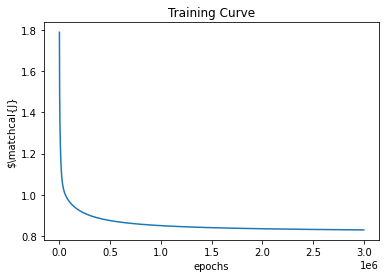

Training Accuracy: 0.6455


In [ ]:
logreg.fit(X_training, y_training, eta=7e-4, epochs =3e6, show_curve=True)
y_hat = logreg.predict(X_training)+1
print(f"Training Accuracy: {accuracy(y_training, y_hat):0.4f}")

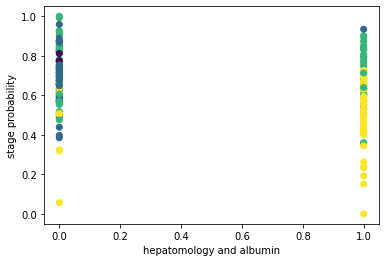

In [ ]:
    plt.figure()
    plt.scatter(X_training[:,4], X_training[:,7], c = y_hat, alpha = 200)
    plt.xlabel("hepatomology and albumin")
    plt.ylabel("stage probability")
    plt.show()

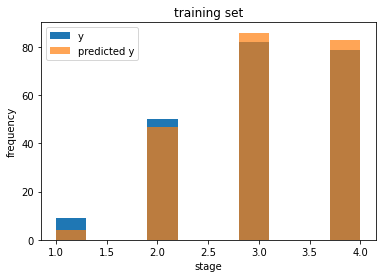

In [ ]:
plt.figure()
plt.hist(y_training, label ='y')
plt.hist(y_hat, label ='predicted y', alpha=0.7)
plt.xlabel("stage")
plt.ylabel("frequency")
plt.title("training set")
plt.legend(loc = 'upper left')


In [ ]:
y_validation = validation['stage'].to_numpy()
X_validation = validation[['duration', 'drug',	'age',	'sex',	'hepatomology',	'spiders',	'cholesterol',	'albumin',	'copper',	'phosphatase',	'SGOT',	'triglicerides',	'platelets',	'prothrombin']].to_numpy()

In [ ]:
y_hat_validation = logreg.predict(X_validation)+1
print(f"validation Accuracy: {accuracy(y_validation, y_hat_validation):0.4f}")

validation Accuracy: 0.3704


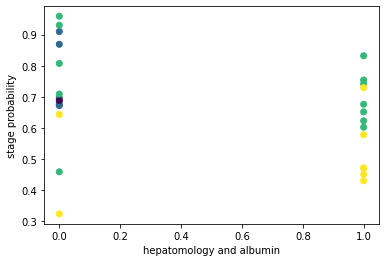

In [ ]:
    plt.figure()
    plt.scatter(X_validation[:,4], X_validation[:,7], c = y_hat_validation, alpha = 200)
    plt.xlabel("hepatomology and albumin")
    plt.ylabel("stage probability")
    plt.show()

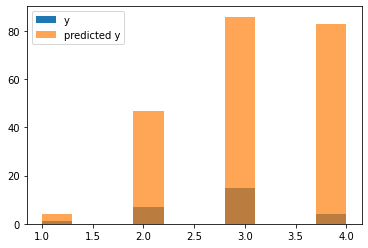

In [ ]:
plt.figure()
plt.hist(y_validation, label ='y')
plt.hist(y_hat, label ='predicted y', alpha=0.7)
plt.legend(loc = 'upper left')

In [ ]:
y_test = test['stage'].to_numpy()
X_test = test[['duration', 'drug',	'age',	'sex',	'hepatomology',	'spiders',	'cholesterol',	'albumin',	'copper',	'phosphatase',	'SGOT',	'triglicerides',	'platelets',	'prothrombin']].to_numpy()

In [ ]:
y_hat_test = logreg.predict(X_test)+1
print(f"Test Accuracy: {accuracy(y_test, y_hat_test):0.4f}")

Test Accuracy: 0.5517


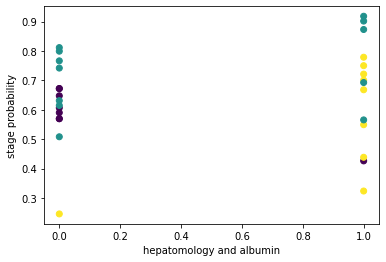

In [ ]:
    plt.figure()
    plt.scatter(X_test[:,4], X_test[:,7], c = y_hat_test, alpha = 200)
    plt.xlabel("hepatomology and albumin")
    plt.ylabel("stage probability")
    plt.show()

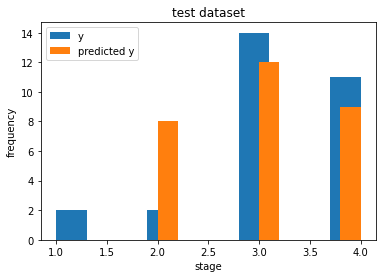

In [ ]:
plt.figure()
plt.hist(y_test, label ='y')
plt.hist(y_hat_test, label ='predicted y')
plt.xlabel("stage")
plt.ylabel("frequency")
plt.title("test dataset")
plt.legend(loc = 'upper left')